## WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import logging
import math

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lat_lngs

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities
units = imperial

query_url = f"{base_url}appid={weather_api_key}&units{units}&q={city}"

# Get weather data
#weather_response = requests.get(query_url).json()


In [5]:
cities_results = []

#Conversion of Kelvin to Fahrenheit


for index,city in enumerate(cities):
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units=imperial"

    print(f'found {city}')
          
    try:
        # Get weather data
        weather_response = requests.get(query_url).json()
        lon=weather_response["coord"]["lon"]
        lat=weather_response["coord"]["lat"]
        cities_results.append(weather_response)
        
        
    except:
        print(f"No City Data Found for {city}")

         
    
         




found la palma&[city id]
found mar del plata&[city id]
found east london&[city id]
found eyemouth&[city id]
found lagoa&[city id]
found albany&[city id]
found te anau&[city id]
found puerto ayora&[city id]
found castro&[city id]
found ushuaia&[city id]
found butaritari&[city id]
found thompson&[city id]
found nanortalik&[city id]
found grand gaube&[city id]
found nikolskoye&[city id]
found malanje&[city id]
found avarua&[city id]
found roebourne&[city id]
found jamestown&[city id]
found ribeira grande&[city id]
found yellowknife&[city id]
found umm lajj&[city id]
found luan&[city id]
found aden&[city id]
found illoqqortoormiut&[city id]
No City Data Found for illoqqortoormiut
found rikitea&[city id]
found mahebourg&[city id]
found faanui&[city id]
found taolanaro&[city id]
No City Data Found for taolanaro
found privolzhskiy&[city id]
found lompoc&[city id]
found provideniya&[city id]
found cape town&[city id]
found hilo&[city id]
found punta arenas&[city id]
found tuktoyaktuk&[city id]

found coihaique&[city id]
found roma&[city id]
found dikson&[city id]
found marawi&[city id]
found vangaindrano&[city id]
found guerrero negro&[city id]
found ust-ishim&[city id]
found antsohihy&[city id]
found egvekinot&[city id]
found nelson bay&[city id]
found skjervoy&[city id]
found katsuura&[city id]
found iroquois falls&[city id]
found catuday&[city id]
found omboue&[city id]
found umm ruwabah&[city id]
No City Data Found for umm ruwabah
found vanavara&[city id]
found ngukurr&[city id]
No City Data Found for ngukurr
found huarmey&[city id]
found mwinilunga&[city id]
found bagn&[city id]
found ixtapa&[city id]
found saint-joseph&[city id]
found golden&[city id]
found san felipe&[city id]
found nouadhibou&[city id]
found broken hill&[city id]
found kulhudhuffushi&[city id]
found waddan&[city id]
found pevek&[city id]
found bustamante&[city id]
found kim&[city id]
found touros&[city id]
found puerto el triunfo&[city id]
found casper&[city id]
found montes claros&[city id]
found los

No City Data Found for kuche
found manokwari&[city id]
found svetlyy&[city id]
found tunceli&[city id]
found lahat&[city id]
found huilong&[city id]
found hohhot&[city id]
found noumea&[city id]
found port lincoln&[city id]
found verkhoyansk&[city id]
found nago&[city id]
found malwan&[city id]
No City Data Found for malwan
found modasa&[city id]
found jieshi&[city id]
found gizo&[city id]
found steinbach&[city id]
found les cayes&[city id]
found bafq&[city id]
found aflu&[city id]
No City Data Found for aflu
found tefe&[city id]
found tokur&[city id]
found namatanai&[city id]
found anshun&[city id]
found tumannyy&[city id]
No City Data Found for tumannyy
found vestmanna&[city id]
found timaru&[city id]
found ketchikan&[city id]
found san borja&[city id]
found almaznyy&[city id]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
len(cities_results)

543

In [7]:
city_data = []
for i,city in enumerate(cities_results):
    cityname = city["name"]
    citytemp = city["main"]["temp"]
    citylat = city["coord"]["lat"]
    cityhum = city["main"]["humidity"]
    citycloud = city["clouds"]["all"]
    citywind = city["wind"]["speed"]
    city_data.append(
        {"City": cityname,
        "Temperature": citytemp,
        "Latitude": citylat,
        "Humidity %" : cityhum,
        "Cloudiness %" : citycloud,
        "Wind Speed" : citywind
        })


In [8]:
cities_res_df = pd.DataFrame(city_data)

In [9]:
cities_res_df

,City,Temperature,Latitude,Humidity %,Cloudiness %,Wind Speed
0,La Palma,59.50,33.85,59,40,13.87
1,Mar del Plata,80.60,-38.00,42,0,9.17
2,East London,70.34,-33.02,76,98,5.12
3,Eyemouth,49.28,55.87,93,100,16.11
4,Lagoa,62.11,39.05,80,100,25.99
...,...,...,...,...,...,...
538,Vestmanna,44.60,62.16,93,10,9.17
539,Timaru,71.01,-44.40,70,0,8.99
540,Ketchikan,37.40,55.34,100,90,23.04
541,San Borja,77.85,-14.82,82,94,2.64


cities_res_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.

'100' in cities_res_df.values




False

NameError: name 'booleans' is not defined

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

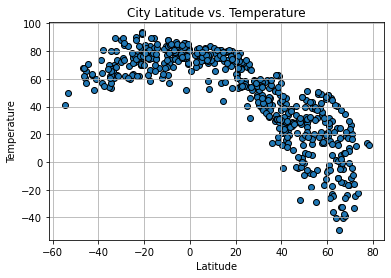

In [38]:
#Scatterplot showing the Latitude vs. Temperature

latitude = cities_res_df['Latitude']
temperature = cities_res_df['Temperature']
edgecolors = ['black']
plt.scatter(latitude, temperature, edgecolors=edgecolors)
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(b=True)
plt.show()


In [43]:
print(f"This Scatter Plot measures the the city's Latitude from the Equator to its Temperature")

This Scatter Plot measures the the city's latitude from the Equator to its temperature


## Latitude vs. Humidity Plot

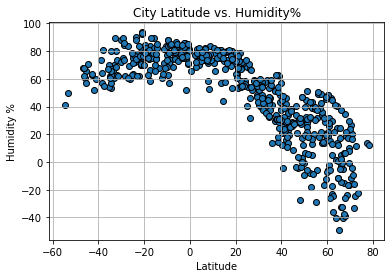

In [39]:
latitude = cities_res_df['Latitude']
humidity = cities_res_df['Humidity %']
edgecolors = ['black']
plt.scatter(latitude, temperature, edgecolors=edgecolors)
plt.title("City Latitude vs. Humidity%")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(b=True)
plt.show()

In [45]:
print(f"This Scatter Plot measures the the city's Latitude from the Equator/Prime Meridian relative to Humidity")

This Scatter Plot measures the the city's Latitude related to it's Humidity


## Latitude vs. Cloudiness Plot

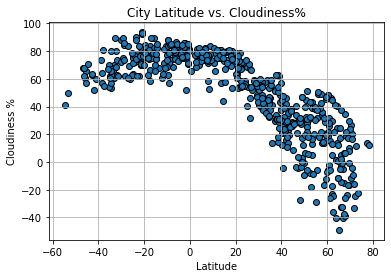

In [41]:
latitude = cities_res_df['Latitude']
cloudiness = cities_res_df['Cloudiness %']
edgecolors = ['black']
plt.scatter(latitude, temperature, edgecolors=edgecolors)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True)
plt.show()

In [44]:
print(f"This Scatter Plot measures the the city's Latitude from the Equator/Prime Meridian to Cloud cover")

This Scatter Plot measures the the city's Latitude from the Equator to its Cloud cover


## Latitude vs. Wind Speed Plot

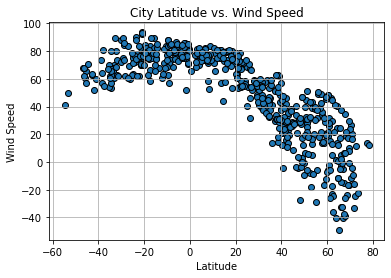

In [42]:
latitude = cities_res_df['Latitude']
windspeed = cities_res_df['Wind Speed']
edgecolors = ['black']
plt.scatter(latitude, temperature, edgecolors=edgecolors)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(b=True)
plt.show()

In [46]:
print(f"This Scatter Plot measures the the city's Latitude from the Equator/Prime Meridian to Wind Speed")

This Scatter Plot measures the the city's Latitude from the Equator/Prime Meridian to Wind Speed


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression